In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [6]:
teams_df = pd.read_csv('data/2025/womens_summer_u20_sw_teams.csv')
teams_df

,Club ID,Club
0,175325,BURLINGTON SC U20 WOMEN
1,175422,CAMBRIDGE UNITED U20 WOMEN
2,183439,GUELPH UNITED FC U20 WOMEN
3,175336,HAMILTON UNITED U20 WOMEN
4,183440,FC LONDON U20 WOMEN
5,183434,RAILWAY CITY FC U20 WOMEN
6,183442,ST CATHARINES ROMA U20 WOMEN


In [7]:
scores_df = pd.read_csv('data/2025/2025-06-29_womens_summer_u20_sw_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,262614800,0,2,183442,183439
1,262614801,1,5,183440,175336
2,262614803,1,5,175422,183434
3,262614804,2,7,183442,175325
4,262614806,1,1,175336,183439
5,262614807,2,0,183434,183440
6,262614808,0,3,183434,175336
7,262614809,3,0,175325,183440
8,262614810,0,3,175422,183442
9,262614813,1,5,175422,175325


In [8]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [9]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           BURLINGTON SC U20 WOMEN  CAMBRIDGE UNITED U20 WOMEN  GUELPH UNITED FC U20 WOMEN  HAMILTON UNITED U20 WOMEN  FC LONDON U20 WOMEN  RAILWAY CITY FC U20 WOMEN  ST CATHARINES ROMA U20 WOMEN
262614800                        0                           0                           1                          0                    0                          0                            -1
262614801                        0                           0                           0                          1                   -1                          0                             0
262614803                        0                          -1                           0                          0                    0                          1                             0
262614804                        1                           0                           0                          0                    0                          0                            -1
262614806           

In [10]:
print(X_df.T.to_string())

                              262614800  262614801  262614803  262614804  262614806  262614807  262614808  262614809  262614810  262614813  262614815  262614816  262614817  262614818  262614821  262614822  262614823  262614825  262614827  262614829  262614830  262614831  262614832  262614834  262614835  262614836  262614837  262614839
BURLINGTON SC U20 WOMEN               0          0          0          1          0          0          0          1          0          1          0          0         -1          0          0         -1          0          1          0          0          1          0          0          0          1          0          1          0
CAMBRIDGE UNITED U20 WOMEN            0          0         -1          0          0          0          0          0         -1         -1          0          0          0         -1          0          0         -1          0          1          0          0         -1          0          0         -1          0          0 

In [11]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                              BURLINGTON SC U20 WOMEN  CAMBRIDGE UNITED U20 WOMEN  GUELPH UNITED FC U20 WOMEN  HAMILTON UNITED U20 WOMEN  FC LONDON U20 WOMEN  RAILWAY CITY FC U20 WOMEN  ST CATHARINES ROMA U20 WOMEN
BURLINGTON SC U20 WOMEN                             9                          -2                          -2                         -1                   -1                         -1                            -2
CAMBRIDGE UNITED U20 WOMEN                         -2                           8                          -1                         -1                   -2                         -1                            -1
GUELPH UNITED FC U20 WOMEN                         -2                          -1                           8                         -2                   -1                         -1                            -1
HAMILTON UNITED U20 WOMEN                          -1                          -1                          -2                          8    

In [12]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                              BURLINGTON SC U20 WOMEN  CAMBRIDGE UNITED U20 WOMEN  GUELPH UNITED FC U20 WOMEN  HAMILTON UNITED U20 WOMEN  FC LONDON U20 WOMEN  RAILWAY CITY FC U20 WOMEN  ST CATHARINES ROMA U20 WOMEN
BURLINGTON SC U20 WOMEN                             9                          -2                          -2                         -1                   -1                         -1                            -2
CAMBRIDGE UNITED U20 WOMEN                         -2                           8                          -1                         -1                   -2                         -1                            -1
GUELPH UNITED FC U20 WOMEN                         -2                          -1                           8                         -2                   -1                         -1                            -1
HAMILTON UNITED U20 WOMEN                          -1                          -1                          -2                          8    

In [13]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                              GD
BURLINGTON SC U20 WOMEN       13
CAMBRIDGE UNITED U20 WOMEN   -23
GUELPH UNITED FC U20 WOMEN     7
HAMILTON UNITED U20 WOMEN     16
FC LONDON U20 WOMEN           -4
RAILWAY CITY FC U20 WOMEN      9
ST CATHARINES ROMA U20 WOMEN   0


In [14]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                              GD with limited blowouts
BURLINGTON SC U20 WOMEN                             10
CAMBRIDGE UNITED U20 WOMEN                         -17
GUELPH UNITED FC U20 WOMEN                           7
HAMILTON UNITED U20 WOMEN                           13
FC LONDON U20 WOMEN                                 -6
RAILWAY CITY FC U20 WOMEN                            7
ST CATHARINES ROMA U20 WOMEN                         0


In [15]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                              massey_rating
HAMILTON UNITED U20 WOMEN          1.725277
GUELPH UNITED FC U20 WOMEN         1.080867
BURLINGTON SC U20 WOMEN            1.002528
RAILWAY CITY FC U20 WOMEN          0.769354
FC LONDON U20 WOMEN               -0.522435
ST CATHARINES ROMA U20 WOMEN      -1.553379
CAMBRIDGE UNITED U20 WOMEN        -2.502212


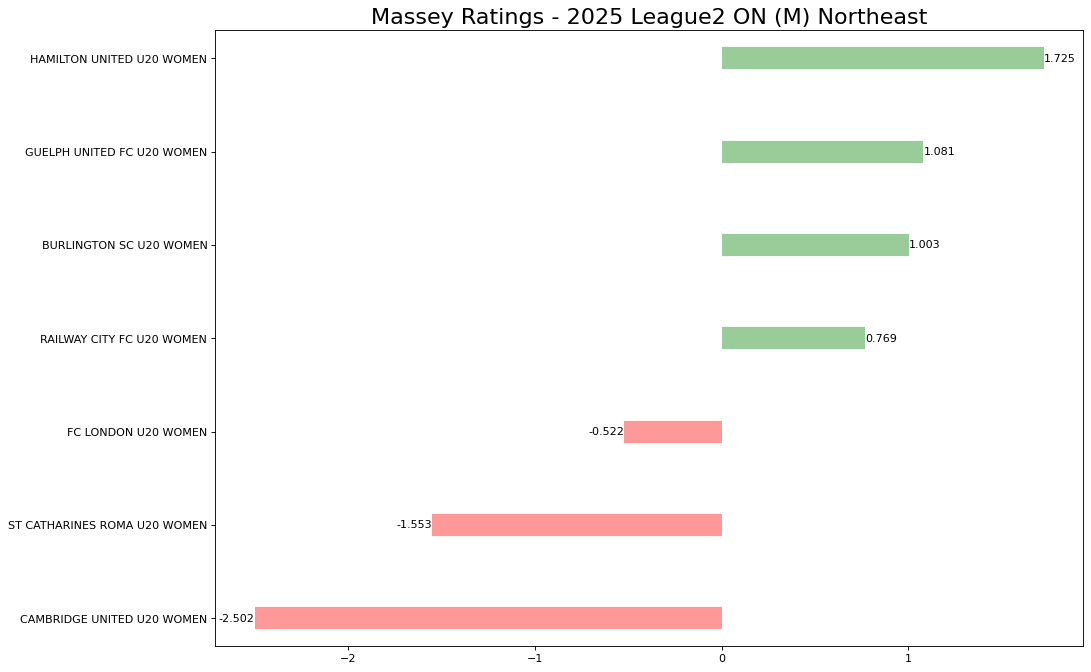

In [16]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [17]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                              massey_rating
HAMILTON UNITED U20 WOMEN          1.429488
GUELPH UNITED FC U20 WOMEN         1.025272
BURLINGTON SC U20 WOMEN            0.797957
RAILWAY CITY FC U20 WOMEN          0.563310
FC LONDON U20 WOMEN               -0.770329
ST CATHARINES ROMA U20 WOMEN      -1.159880
CAMBRIDGE UNITED U20 WOMEN        -1.885819


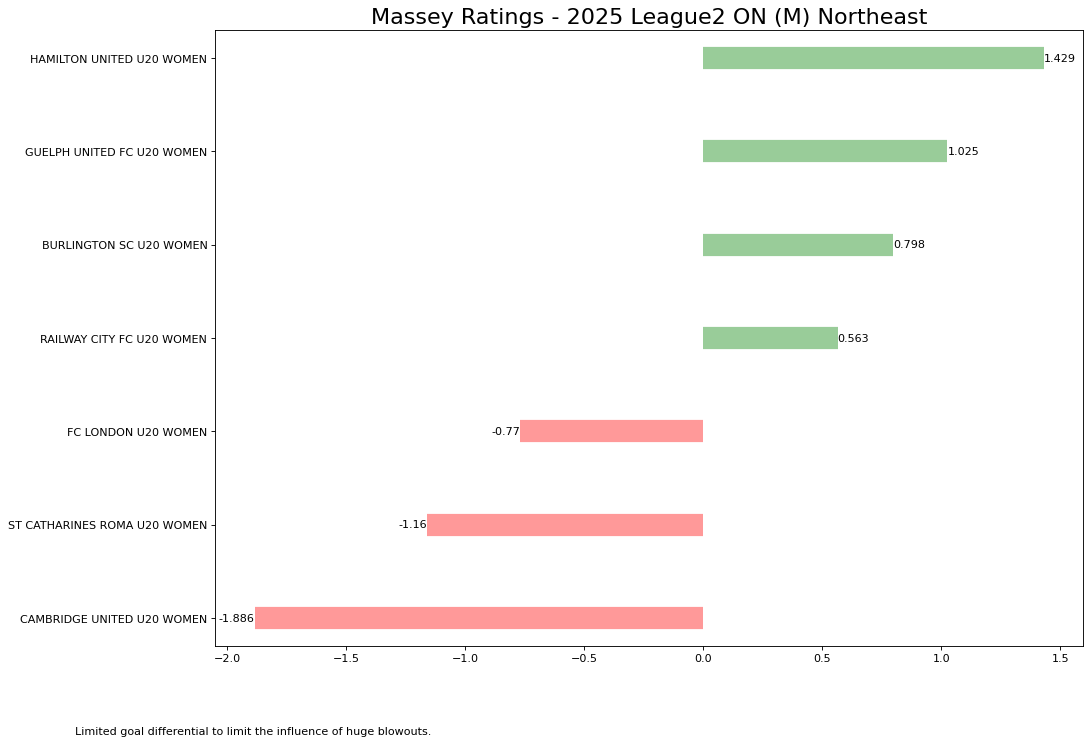

In [18]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 League2 ON (M) Northeast', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()